Figures S6A,B and S7A,B in Mahdavi & Siegel (2021) Indoor Air (in the SI)

This figure illustrates mass content on the filters versus effective filtration volumes for PM2.5 and PM10 in ASHRAE RP-1649 filtration project.

Plot type: Scatter plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.container as container
import matplotlib.ticker as mtick
import numpy as np
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [2]:
### Reading from the main dataframe (pm_master) and defining the x and y axes values

df = pd.read_excel(backslash_correct(r'C:\PhD Research\PhD - PSD TSP\Processed\pm_master.xlsx'))

df['PM10 mass'] = df['TSP mass'] * (df['PM10 Fr']/100)
df['PM2.5 mass'] = df['TSP mass'] * (df['PM2.5 Fr']/100)

df['PM10 mass error'] = df['TSP mass error'] * (df['PM10 Fr']/100)
df['PM2.5 mass error'] = df['TSP mass error'] * (df['PM2.5 Fr']/100)


df['inv eff fv 10'] = 1/(df['filtration volume'] * (df['eff_10']/100))
df['inv eff fv 2.5'] = 1/(df['filtration volume'] * (df['eff_2.5']/100))

df['inv eff fv 10 error'] = df['inv eff fv 10'] * np.sqrt((df['filtration volume error']/df['filtration volume']).pow(2) + (df['eff_10_err']/df['eff_10']).pow(2))
df['inv eff fv 2.5 error'] = df['inv eff fv 2.5'] * np.sqrt((df['filtration volume error']/df['filtration volume']).pow(2) + (df['eff_2.5_err']/df['eff_2.5']).pow(2))

df.columns

df = df[['ft', 'PM10', 'PM10 error', 'PM2.5', 'PM2.5 error', 
        'PM10 mass', 'PM2.5 mass', 'PM10 mass error', 'PM2.5 mass error',
        'inv eff fv 10', 'inv eff fv 2.5', 'inv eff fv 10 error', 'inv eff fv 2.5 error']]

df_10_refine = df[(df['PM10 error']/df['PM10']) < 0.75]
df_25_refine = df[(df['PM2.5 error']/df['PM2.5']) < 0.75]

for f in df['ft'].unique():
    locals()['xa_%s_' %f] = df_10_refine.loc[df_10_refine['ft'] == f, 'PM10 mass' ]
    locals()['xa_%s_err' %f] = df_10_refine.loc[df_10_refine['ft'] == f, 'PM10 mass error']
    
    locals()['xb_%s_' %f] = df_10_refine.loc[df_10_refine['ft'] == f, 'inv eff fv 10']
    locals()['xb_%s_err' %f] = df_10_refine.loc[df_10_refine['ft'] == f, 'inv eff fv 10 error']
        
    locals()['y_%s_' %f] = df_10_refine.loc[df_10_refine['ft'] == f, 'PM10']
    locals()['y_%s_err' %f] = df_10_refine.loc[df_10_refine['ft'] == f, 'PM10 error']
    
    

color_code = {1:'b',
              2:'r',
              3:'g',
              4:'k'}

marker_code = {1:'o',
               2:'s',
               3:'^',
               4:'D'}

label_code = {1:'8',
              2:'8E',
              3:'11',
              4:'14'}


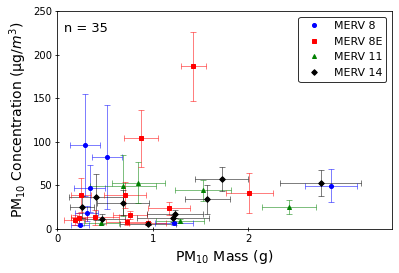

In [3]:
##### Figure S6a

plt.figure()

for f in range(1,5):
    plt.errorbar(locals()['xa_%s_' %f], 
                 locals()['y_%s_' %f], 
                 xerr = [locals()['xa_%s_err' %f],locals()['xa_%s_err' %f]],
                 yerr = [locals()['y_%s_err' %f],locals()['y_%s_err' %f]], 
                 capsize = 3, c = color_code[f], ecolor = color_code[f], lw = 0, elinewidth = 0.5, capthick = 0.5, 
                 label = 'MERV ' + label_code[f], marker = marker_code[f], ms = 4)

    
# plt.xscale('log')
plt.xlim(0, 3.5)
# a = [0.000003, 0.00001, 0.00003, 0.0001]
plt.xticks(np.arange(0, 3., step = 1))

# ax = plt.gca()
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.minorticks_off()
plt.xlabel(r'PM$_{10}$ Mass (g)', size = 14) # FIX THIS

plt.ylim(0, 250)
plt.yticks(np.arange(0, 251, step = 50))
plt.ylabel('PM$_{10}$ Concentration (µg/$m^{3}$)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', fontsize = 11)


# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(0.3, 230, 'n = ' + str(len(df_10_refine)), ha = 'center', va = 'center', fontsize = 13)
plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_s6a.jpg', format='jpg', dpi=1600, bbox_inches='tight')


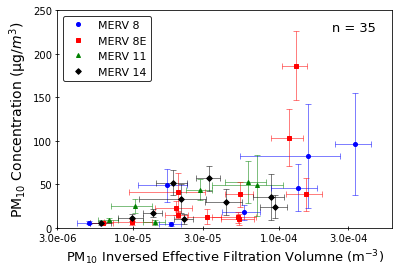

In [4]:
plt.figure()

for f in range(1,5):
    plt.errorbar(locals()['xb_%s_' %f], 
                 locals()['y_%s_' %f], 
                 xerr = [locals()['xb_%s_err' %f],locals()['xb_%s_err' %f]],
                 yerr = [locals()['y_%s_err' %f],locals()['y_%s_err' %f]], 
                 capsize = 3, c = color_code[f], ecolor = color_code[f], lw = 0, elinewidth = 0.5, capthick = 0.5, 
                 label = 'MERV ' + label_code[f], marker = marker_code[f], ms = 4)


plt.xscale('log')
plt.xlim(0.000003, 0.0006)
a = [0.000003, 0.00001, 0.00003, 0.0001, 0.0003]
plt.xticks(ticks = a, labels = a)

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.minorticks_off()
plt.xlabel(r'PM$_{10}$ Inversed Effective Filtration Volumne (m$^{-3}$)', size = 13) # FIX THIS

plt.ylim(0, 250)
plt.yticks(np.arange(0, 251, step = 50))
plt.ylabel('PM$_{10}$ Concentration (µg/$m^{3}$)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 2, frameon = True, edgecolor = 'black', fontsize = 11)


# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(0.00033, 230, 'n = ' + str(len(df_10_refine)), ha = 'center', va = 'center', fontsize = 13)
plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_s6b.jpg', format='jpg', dpi=1600, bbox_inches='tight')


In [5]:
#### Taking PM2.5 values

for f in df['ft'].unique():
    locals()['xa_%s_' %f] = df_25_refine.loc[df_25_refine['ft'] == f, 'PM2.5 mass' ]
    locals()['xa_%s_err' %f] = df_25_refine.loc[df_25_refine['ft'] == f, 'PM2.5 mass error']
    
    locals()['xb_%s_' %f] = df_25_refine.loc[df_25_refine['ft'] == f, 'inv eff fv 2.5']
    locals()['xb_%s_err' %f] = df_25_refine.loc[df_25_refine['ft'] == f, 'inv eff fv 2.5 error']
        
    locals()['y_%s_' %f] = df_25_refine.loc[df_25_refine['ft'] == f, 'PM2.5']
    locals()['y_%s_err' %f] = df_25_refine.loc[df_25_refine['ft'] == f, 'PM2.5 error']


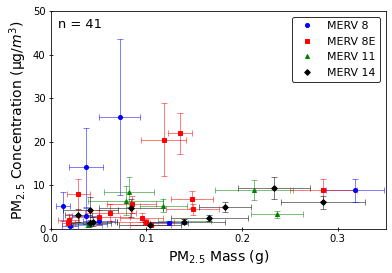

In [6]:
##### Figure S7A

plt.figure()

for f in range(1,5):
    plt.errorbar(locals()['xa_%s_' %f], 
                 locals()['y_%s_' %f], 
                 xerr = [locals()['xa_%s_err' %f],locals()['xa_%s_err' %f]],
                 yerr = [locals()['y_%s_err' %f],locals()['y_%s_err' %f]], 
                 capsize = 3, c = color_code[f], ecolor = color_code[f], lw = 0, elinewidth = 0.5, capthick = 0.5, 
                 label = 'MERV ' + label_code[f], marker = marker_code[f], ms = 4)

    
# plt.xscale('log')
plt.xlim(0, 0.35)
# a = [0.000003, 0.00001, 0.00003, 0.0001]
plt.xticks(np.arange(0, 0.35, step = 0.1))

# ax = plt.gca()
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.minorticks_off()
plt.xlabel(r'PM$_{2.5}$ Mass (g)', size = 14)

plt.ylim(0, 50)
plt.yticks(np.arange(0, 51, step = 10))
plt.ylabel('PM$_{2.5}$ Concentration (µg/$m^{3}$)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', fontsize = 11)


# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(0.03, 47, 'n = ' + str(len(df_25_refine)), ha = 'center', va = 'center', fontsize = 13)
plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_s7a.jpg', format='jpg', dpi=1600, bbox_inches='tight')



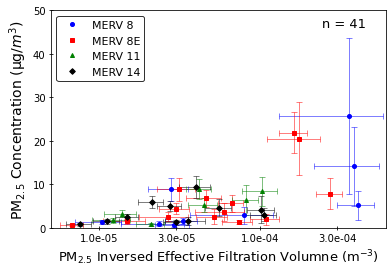

In [7]:
##### Figure S7B

plt.figure()

for f in range(1,5):
    plt.errorbar(locals()['xb_%s_' %f], 
                 locals()['y_%s_' %f], 
                 xerr = [locals()['xb_%s_err' %f],locals()['xb_%s_err' %f]],
                 yerr = [locals()['y_%s_err' %f],locals()['y_%s_err' %f]], 
                 capsize = 3, c = color_code[f], ecolor = color_code[f], lw = 0, elinewidth = 0.5, capthick = 0.5, 
                 label = 'MERV ' + label_code[f], marker = marker_code[f], ms = 4)


plt.xscale('log')
plt.xlim(0.000005, 0.0006)
a = [0.00001, 0.00003, 0.0001, 0.0003]
plt.xticks(ticks = a, labels = a)

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.minorticks_off()
plt.xlabel(r'PM$_{2.5}$ Inversed Effective Filtration Volumne (m$^{-3}$)', size = 13) # FIX THIS

plt.ylim(0, 50)
plt.yticks(np.arange(0, 51, step = 10))
plt.ylabel('PM$_{2.5}$ Concentration (µg/$m^{3}$)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 2, frameon = True, edgecolor = 'black', fontsize = 11)


# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(0.00033, 47, 'n = ' + str(len(df_25_refine)), ha = 'center', va = 'center', fontsize = 13)
plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_s7b.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code